### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error as mse

### Load and Preprocess the data for Training

In [2]:
train_df = pd.read_excel('Mining-Data.xlsx', sheet_name='My_Training_Data70')
test_df = pd.read_excel('Mining-Data.xlsx', sheet_name='Testing_30')


X_train = train_df.drop('Recovery(%)', axis=1)
y_train = train_df[['Recovery(%)']]
X_test = test_df.drop('Recovery(%)', axis = 1)
y_test = test_df[['Recovery(%)']]

scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X_train_normalized = scaler_X.fit_transform(X_train)
X_test_normalized = scaler_X.transform(X_test)


y_train_normalized = scaler_Y.fit_transform(y_train)
y_test_normalized = scaler_Y.transform(y_test.values)

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


### Model Creation and Development

In [3]:
model = SVR(kernel='sigmoid')
model.fit(X_train_normalized, y_train_normalized)

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='sigmoid')

### The Model's Intercept and Coefficient Values
#### NB: The Coefficient values commensurate directly with the features in the dataframe

In [4]:
# print(f"Model's Intercept: {model.intercept_[0]}")
# print(f"Model's Coefficients: {model.coef_[0]}")

In [5]:
y_pred_scaled = model.predict(X_test_normalized)
y_pred_original = scaler_Y.inverse_transform(y_pred_scaled.reshape(-1,1))

### Model Performance metric using the test set

In [6]:
rmse = np.sqrt(mse(y_test, y_pred_original))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 1.2614714304206367


### Comparison of the Predicted and Actual Values of "Recovery (%)", target variable

In [7]:
compare_df = pd.DataFrame(y_pred_original, columns=['Predicted'])
compare_df['Actual'] = y_test

#### A small peek into the dataframe

In [8]:
compare_df.head(10)

,Predicted,Actual
0,90.153836,89.959033
1,90.577739,90.590392
2,90.480300,88.761667
3,89.706360,90.777612
4,90.454504,90.116769
5,89.558972,90.428091
6,89.622107,91.709526
7,91.791896,89.376526
8,90.338193,90.828132
9,89.837400,90.003263


### A comparison plot

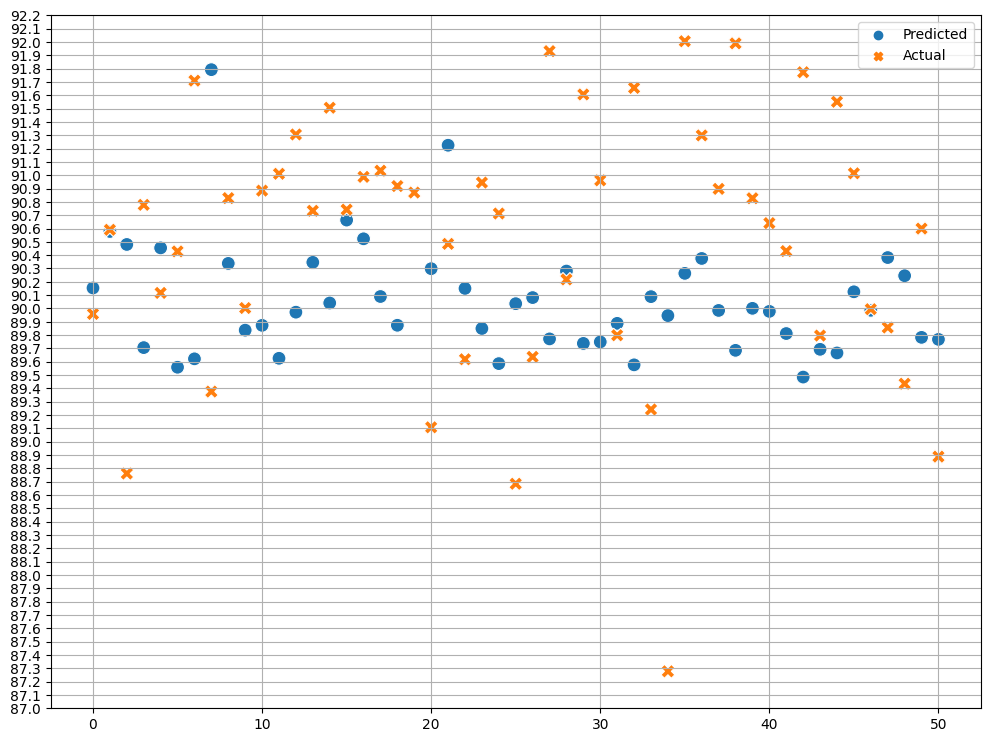

In [9]:
plt.figure(figsize=(12,9))

y_ticks = np.arange(87.0, 92.2, 0.1)
plt.ylim(87.0, 92.2)
plt.yticks(y_ticks)


sns.scatterplot(compare_df, s=100)
plt.grid(True)